### DATA SCIENCE
Understanding Netflix Content Trends Through Data Science

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load the Dataset

In [4]:
df = pd.read_csv("netflix_titles.csv", encoding="latin-1")
# (latin-1 is used to avoid UnicodeDecodeError caused by special characters)

# Display first 5 rows of the dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Understand the Dataset Structure

In [5]:
# Displays number of rows and columns in the dataset
df.shape


(8809, 26)

In [6]:
# Displays column names
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [7]:
# Displays dataset information such as data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [8]:
# Remove all columns whose names start with 'Unnamed'
# These columns are empty and do not contain any useful information
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [10]:
df.shape


(8809, 12)

In [11]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Check the number of missing (null) values in each column
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


### Data Preprocessing

In [16]:
# Handle missing values in categorical text columns

df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')

# Fill missing values in 'rating' using the most frequent value (mode)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

df['duration'] = df['duration'].fillna('Not Specified')

# Fill missing values in 'date_added' using the most frequent date
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])



In [17]:
# Verify that there are no missing values remaining
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Descriptive Statistics

In [20]:
# Display statistical summary of numerical columns
df.describe()


,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [21]:
# Count number of Movies and TV Shows
df['type'].value_counts()


,count
type,
Movie,6132
TV Show,2677


In [22]:
# Display top 5 content ratings
df['rating'].value_counts().head()


,count
rating,
TV-MA,3212
TV-14,2160
TV-PG,863
R,799
PG-13,490


In [23]:
# Count number of unique countries
df['country'].nunique()


749

In [27]:
# Display top 5 most common genres
df['listed_in'].value_counts().head()


,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252


In [28]:
# Display top 10 years with highest content releases
df['release_year'].value_counts().head(10)


,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,353
2013,288


Data Visualization

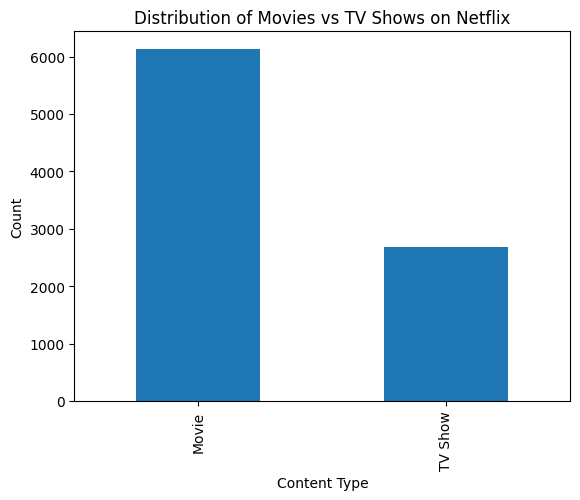

In [29]:
# Plot a bar chart to compare the number of Movies and TV Shows on Netflix
df['type'].value_counts().plot(kind='bar')

# Add title and axis labels
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")

# Display the plot
plt.show()



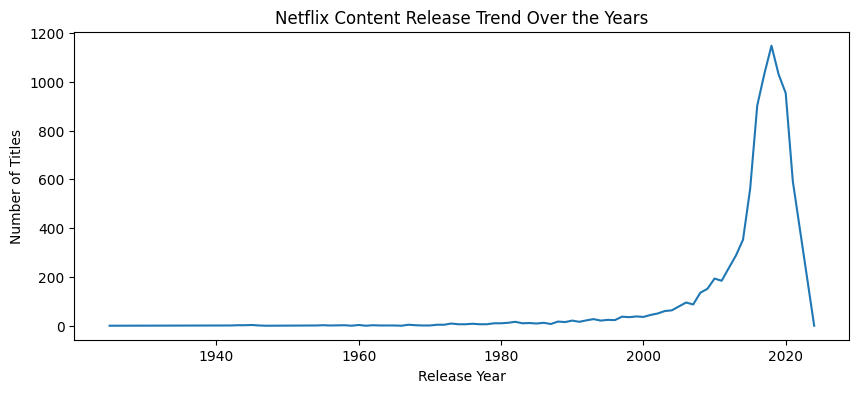

In [30]:
# Plot year-wise content release trend
df['release_year'].value_counts().sort_index().plot(figsize=(10, 4))

# Add title and axis labels
plt.title("Netflix Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")

# Display the plot
plt.show()



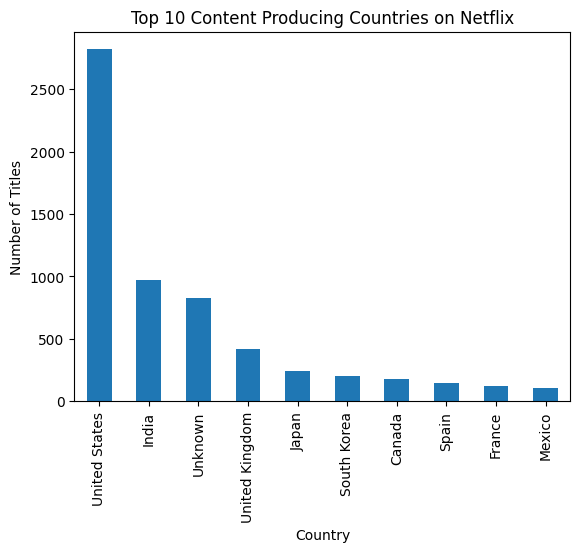

In [31]:
# Plot top 10 countries with highest number of Netflix titles
df['country'].value_counts().head(10).plot(kind='bar')

# Add title and axis labels
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")

# Display the plot
plt.show()



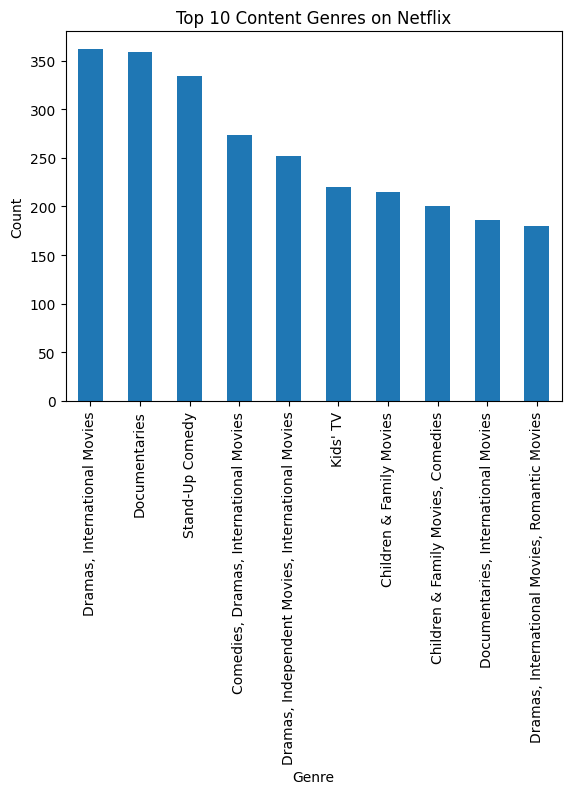

In [33]:
# Plot top 10 most common genres/categories
df['listed_in'].value_counts().head(10).plot(kind='bar')

# Add title and axis labels
plt.title("Top 10 Content Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")

# Display the plot
plt.show()


## Conclusion



The analysis revealed that Netflix has a higher number of movies compared to TV shows, with a significant increase in content production after 2015. The United States emerged as the largest contributor of content. Overall, this project demonstrates how data science techniques can be applied to extract meaningful insights from real-world datasets.
